<a href="https://colab.research.google.com/github/Mwenda-Eric/Kenyan-Conflicts/blob/main/conflict_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)


#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data
df = pd.read_csv("conflict_data_ken.csv")

Display initial information of the dataset to get a glimpse of the data's structure and values.

Displaying the first few rows of the dataset to get a glimpse of the data.
Checking the shape of the dataset (number of rows and columns).
Exploring the column names and data types




In [ ]:
df.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,NaN,NaN,#date+year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#date+end,NaN,NaN,NaN,NaN,#affected+killed,NaN,NaN,NaN,NaN
1,29691.0,ETH-2011-1-54-6,2011,1.0,Clear,1.0,329.0,329.0,Ethiopia: Ogaden,719.0,...,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0,1,1.0,1.0,530.0,NaN
2,25578.0,SOM-2007-1-632-65,2007,1.0,Clear,1.0,337.0,337.0,Somalia: Government,749.0,...,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,520.0,NaN
3,30830.0,SOM-2011-1-770-186,2011,1.0,Clear,1.0,337.0,337.0,Somalia: Government,750.0,...,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,1.0,520.0,NaN
4,31463.0,SOM-2012-1-770-417,2012,1.0,Clear,1.0,337.0,337.0,Somalia: Government,750.0,...,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0,3,3.0,3.0,520.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1095 non-null   float64
 1   relid              1095 non-null   object 
 2   year               1096 non-null   object 
 3   active_year        1095 non-null   float64
 4   code_status        1095 non-null   object 
 5   type_of_violence   1095 non-null   float64
 6   conflict_dset_id   1095 non-null   float64
 7   conflict_new_id    1095 non-null   float64
 8   conflict_name      1095 non-null   object 
 9   dyad_dset_id       1095 non-null   float64
 10  dyad_new_id        1095 non-null   float64
 11  dyad_name          1095 non-null   object 
 12  side_a_dset_id     1095 non-null   float64
 13  side_a_new_id      1095 non-null   float64
 14  side_a             1096 non-null   object 
 15  side_b_dset_id     1095 non-null   float64
 16  side_b_new_id      1095 

In [ ]:
df.shape

(1096, 50)

Exploratory Data Analysis (EDA)

Examining and visualizing the characteristics of a dataset to gain insights, understand patterns, detect anomalies, and prepare the data for further analysis and modeling.
Techniques:


*   Data Visualization
*   Data Cleaning
*   Data Preprocessing







**Data Cleaning**
Remove Unneeded Features
Handling Missing Values
Encoding Categorical Variables
Handling Outliers
Handling Duplicates

In [ ]:
df.isnull().sum()

id                      1
relid                   1
year                    0
active_year             1
code_status             1
type_of_violence        1
conflict_dset_id        1
conflict_new_id         1
conflict_name           1
dyad_dset_id            1
dyad_new_id             1
dyad_name               1
side_a_dset_id          1
side_a_new_id           1
side_a                  0
side_b_dset_id          1
side_b_new_id           1
side_b                  0
number_of_sources       1
source_article          0
source_office         510
source_date           510
source_headline       509
source_original       300
where_prec              1
where_coordinates       0
where_description      12
adm_1                  32
adm_2                 191
latitude                0
longitude               0
geom_wkt                1
priogrid_gid            1
country                 0
iso3                    0
country_id              1
region                  0
event_clarity           1
date_prec   

In [ ]:
columns_to_keep = ['year', 'type_of_violence', 'conflict_name','conflict_new_id', 'dyad_new_id', 'side_a','side_b','side_a_new_id', 'side_b_new_id', 'adm_1', 'adm_2', 'latitude', 'longitude', 'date_start', 'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown']
df = df[columns_to_keep]

In [ ]:
df.shape

(1096, 19)

In [ ]:
df.head()

,year,type_of_violence,conflict_name,conflict_new_id,dyad_new_id,side_a,side_b,side_a_new_id,side_b_new_id,adm_1,adm_2,latitude,longitude,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown
0,#date+year,NaN,NaN,NaN,NaN,#group+name+first,#group+name+second,NaN,NaN,#adm1+name,#adm2+name,#geo+lat,#geo+lon,#date+start,#date+end,NaN,NaN,NaN,NaN
1,2011,1.0,Ethiopia: Ogaden,329.0,719.0,Government of Ethiopia,ONLF,97.0,497.0,Nairobi province,Nairobi district,-1.283333,36.816667,2011-06-20 00:00:00.000,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0
2,2007,1.0,Somalia: Government,337.0,749.0,Government of Somalia,ARS/UIC,95.0,505.0,North Eastern province,Mandera district,3.936804,41.858383,2007-03-16 00:00:00.000,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0
3,2011,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,North Eastern province,Mandera district,3.936804,41.858383,2011-11-24 00:00:00.000,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0
4,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,Coast province,Lamu district,-1.717327,41.334830,2012-01-01 00:00:00.000,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0


In [ ]:
index_label_to_remove = 0
df.drop(index_label_to_remove, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 1 to 1095
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1095 non-null   object 
 1   type_of_violence  1095 non-null   float64
 2   conflict_name     1095 non-null   object 
 3   conflict_new_id   1095 non-null   float64
 4   dyad_new_id       1095 non-null   float64
 5   side_a            1095 non-null   object 
 6   side_b            1095 non-null   object 
 7   side_a_new_id     1095 non-null   float64
 8   side_b_new_id     1095 non-null   float64
 9   adm_1             1063 non-null   object 
 10  adm_2             904 non-null    object 
 11  latitude          1095 non-null   object 
 12  longitude         1095 non-null   object 
 13  date_start        1095 non-null   object 
 14  date_end          1095 non-null   object 
 15  deaths_a          1095 non-null   float64
 16  deaths_b          1095 non-null   float64


In [ ]:
columns_to_drop = ['adm_1', 'adm_2']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.shape

(1095, 17)

In [ ]:
df.head()

,year,type_of_violence,conflict_name,conflict_new_id,dyad_new_id,side_a,side_b,side_a_new_id,side_b_new_id,latitude,longitude,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown
1,2011,1.0,Ethiopia: Ogaden,329.0,719.0,Government of Ethiopia,ONLF,97.0,497.0,-1.283333,36.816667,2011-06-20 00:00:00.000,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0
2,2007,1.0,Somalia: Government,337.0,749.0,Government of Somalia,ARS/UIC,95.0,505.0,3.936804,41.858383,2007-03-16 00:00:00.000,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0
3,2011,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,3.936804,41.858383,2011-11-24 00:00:00.000,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0
4,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.717327,41.334830,2012-01-01 00:00:00.000,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0
5,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.745460,41.488778,2012-01-02 00:00:00.000,2012-01-04 00:00:00.000,0.0,2.0,0.0,0.0


In [ ]:
print('FEATURE ENGINEERING')

FEATURE ENGINEERING


In [ ]:
# Conflict frequency
df['conflict_frequency'] = df.groupby(['side_a', 'side_b'])['conflict_name'].transform('count')

In [ ]:
# Conflict intensity
df['conflict_intensity'] = df['deaths_a'] + df['deaths_b'] + df['deaths_civilians']


In [ ]:
# Calculate the time since last conflict occurred
#df['date_start'] = pd.to_datetime(df['date_start'])
#f = df.sort_values(by=['date_start'])
#df['time_since_last'] = df.groupby(['side_a_new_id', 'side_b_new_id'])['date_start'].diff()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 1 to 1095
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1095 non-null   object 
 1   type_of_violence    1095 non-null   float64
 2   conflict_name       1095 non-null   object 
 3   conflict_new_id     1095 non-null   float64
 4   dyad_new_id         1095 non-null   float64
 5   side_a              1095 non-null   object 
 6   side_b              1095 non-null   object 
 7   side_a_new_id       1095 non-null   float64
 8   side_b_new_id       1095 non-null   float64
 9   latitude            1095 non-null   object 
 10  longitude           1095 non-null   object 
 11  date_start          1095 non-null   object 
 12  date_end            1095 non-null   object 
 13  deaths_a            1095 non-null   float64
 14  deaths_b            1095 non-null   float64
 15  deaths_civilians    1095 non-null   float64
 16  deaths

In [ ]:
df.head()

,year,type_of_violence,conflict_name,conflict_new_id,dyad_new_id,side_a,side_b,side_a_new_id,side_b_new_id,latitude,longitude,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,conflict_frequency,conflict_intensity
1,2011,1.0,Ethiopia: Ogaden,329.0,719.0,Government of Ethiopia,ONLF,97.0,497.0,-1.283333,36.816667,2011-06-20 00:00:00.000,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0,1,1.0
2,2007,1.0,Somalia: Government,337.0,749.0,Government of Somalia,ARS/UIC,95.0,505.0,3.936804,41.858383,2007-03-16 00:00:00.000,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0
3,2011,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,3.936804,41.858383,2011-11-24 00:00:00.000,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0,37,1.0
4,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.717327,41.334830,2012-01-01 00:00:00.000,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0,37,3.0
5,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.745460,41.488778,2012-01-02 00:00:00.000,2012-01-04 00:00:00.000,0.0,2.0,0.0,0.0,37,2.0


In [ ]:
# separating Numerical and categorical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['year', 'conflict_name', 'side_a', 'side_b', 'latitude', 'longitude',
       'date_start', 'date_end'],
      dtype='object')
Numerical Variables:
['type_of_violence', 'conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'side_b_new_id', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'conflict_frequency', 'conflict_intensity']


Data Visualization
Visualization aids in identifying patterns, correlations, and potential insights that may not be apparent from just looking at the raw data


array([[<Axes: title={'center': 'type_of_violence'}>,
        <Axes: title={'center': 'conflict_new_id'}>,
        <Axes: title={'center': 'dyad_new_id'}>],
       [<Axes: title={'center': 'side_a_new_id'}>,
        <Axes: title={'center': 'side_b_new_id'}>,
        <Axes: title={'center': 'deaths_a'}>],
       [<Axes: title={'center': 'deaths_b'}>,
        <Axes: title={'center': 'deaths_civilians'}>,
        <Axes: title={'center': 'deaths_unknown'}>],
       [<Axes: title={'center': 'conflict_frequency'}>,
        <Axes: title={'center': 'conflict_intensity'}>, <Axes: >]],
      dtype=object)

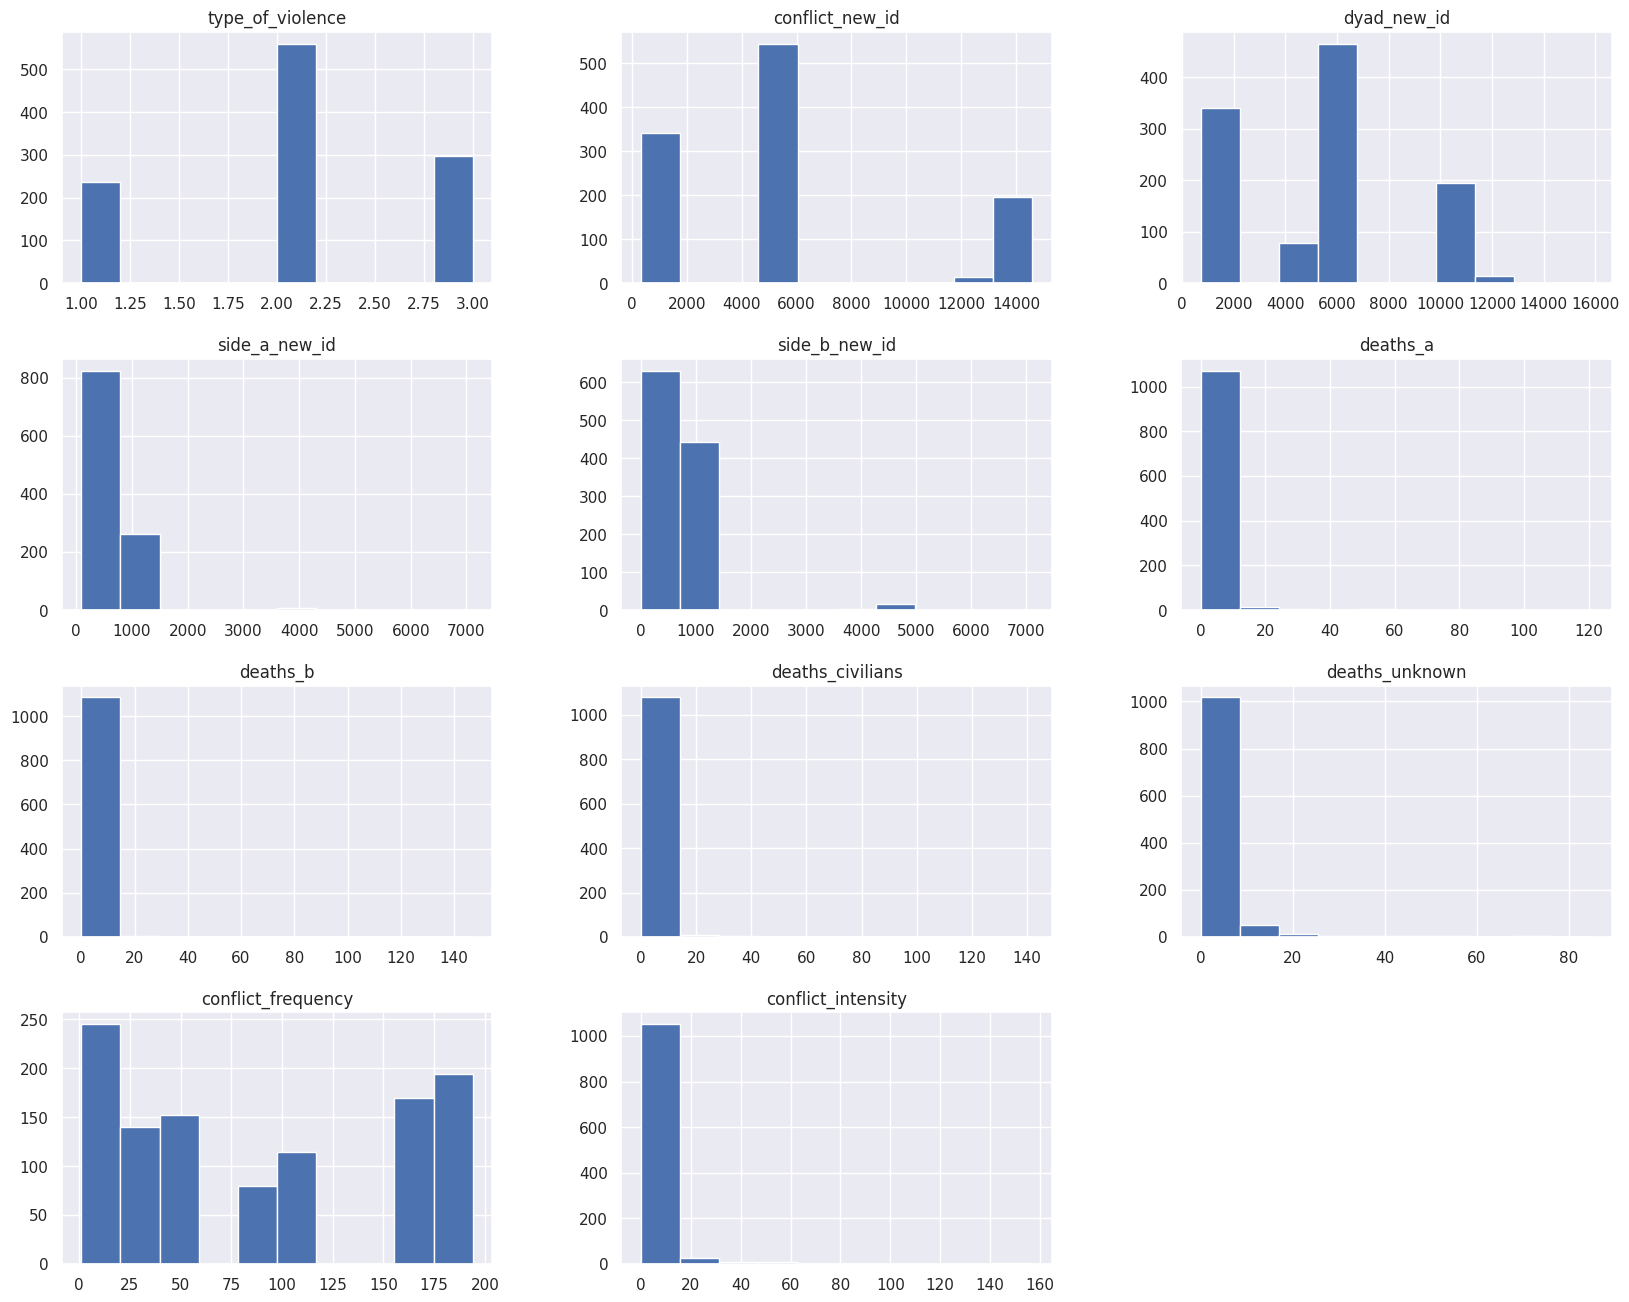

In [ ]:
#viewing numerical variables
#x-axis represents the range of values in the column
# y-axis represents the frequency or count of values within each range
df.hist(figsize = (20,16),grid=True)

In [ ]:
features = ['conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'side_b_new_id',
             'deaths_a', 'deaths_b',
            'deaths_civilians', 'deaths_unknown', 'conflict_frequency',
            'conflict_intensity']
X = df[features]
# Extract the features
X = df[features]

# Convert date columns to numeric
#X['date_start'] = pd.to_numeric(X['date_start'])

#X['time_since_last'] = pd.to_numeric(X['time_since_last'].dt.total_seconds())


In [ ]:
# One-hot encode categorical features
#X = pd.get_dummies(X, columns=['time_since_last'])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Create the target variable 'conflict_indicator'
conditions = [
    (df['deaths_a'] > 5) | (df['deaths_b'] > 5) | (df['deaths_civilians'] > 1),
    #| (df['deaths_unknown'] > 1),
    #(df['type_of_violence'] != '2')
]

df['conflict_indicator'] = 0
for condition in conditions:
    df.loc[condition, 'conflict_indicator'] = 1

# Extract the target variable
y = df['conflict_indicator']

In [ ]:
print(df['conflict_indicator'].value_counts())

conflict_indicator
0    857
1    238
Name: count, dtype: int64


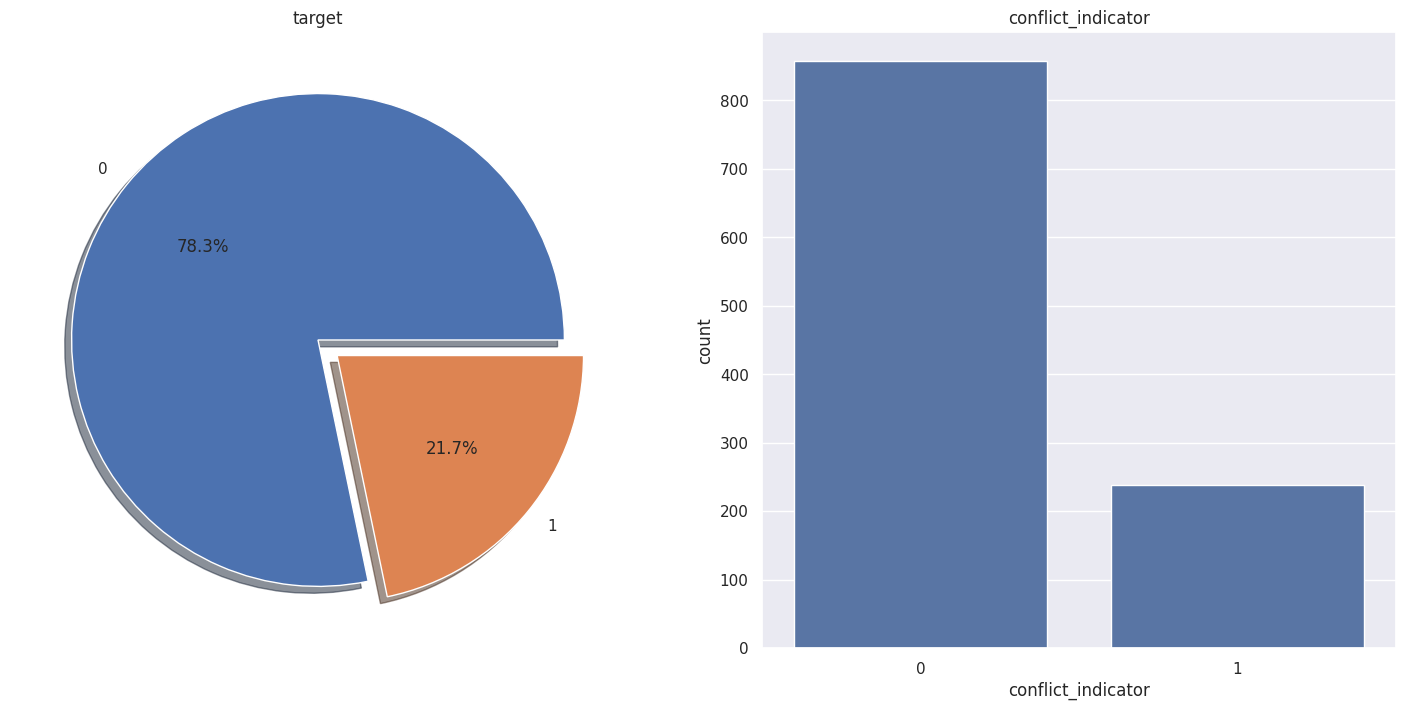

In [ ]:
#The distribution of the conflict_indicator variable in the data examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['conflict_indicator'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=df, x='conflict_indicator')
ax[1].set_title('conflict_indicator')
plt.show()

In [ ]:
df.head()

,year,type_of_violence,conflict_name,conflict_new_id,dyad_new_id,side_a,side_b,side_a_new_id,side_b_new_id,latitude,longitude,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,conflict_frequency,conflict_intensity,conflict_indicator
1,2011,1.0,Ethiopia: Ogaden,329.0,719.0,Government of Ethiopia,ONLF,97.0,497.0,-1.283333,36.816667,2011-06-20 00:00:00.000,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0,1,1.0,0
2,2007,1.0,Somalia: Government,337.0,749.0,Government of Somalia,ARS/UIC,95.0,505.0,3.936804,41.858383,2007-03-16 00:00:00.000,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,0
3,2011,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,3.936804,41.858383,2011-11-24 00:00:00.000,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0,37,1.0,0
4,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.717327,41.334830,2012-01-01 00:00:00.000,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0,37,3.0,0
5,2012,1.0,Somalia: Government,337.0,750.0,Government of Somalia,Al-Shabaab,95.0,717.0,-1.745460,41.488778,2012-01-02 00:00:00.000,2012-01-04 00:00:00.000,0.0,2.0,0.0,0.0,37,2.0,0


conflict_name
Kenya: Northeastern Province and Coast                                                               194
Government of Kenya - Civilians                                                                      170
Pokot - Turkana                                                                                      114
Al-Shabaab - Civilians                                                                                80
Degodia - Garre                                                                                       54
Kalenjin - Kikuyu                                                                                     52
Marakwet - Pokot                                                                                      46
Dassanetch - Turkana                                                                                  39
Somalia: Government                                                                                   38
Borana - Gabra                           

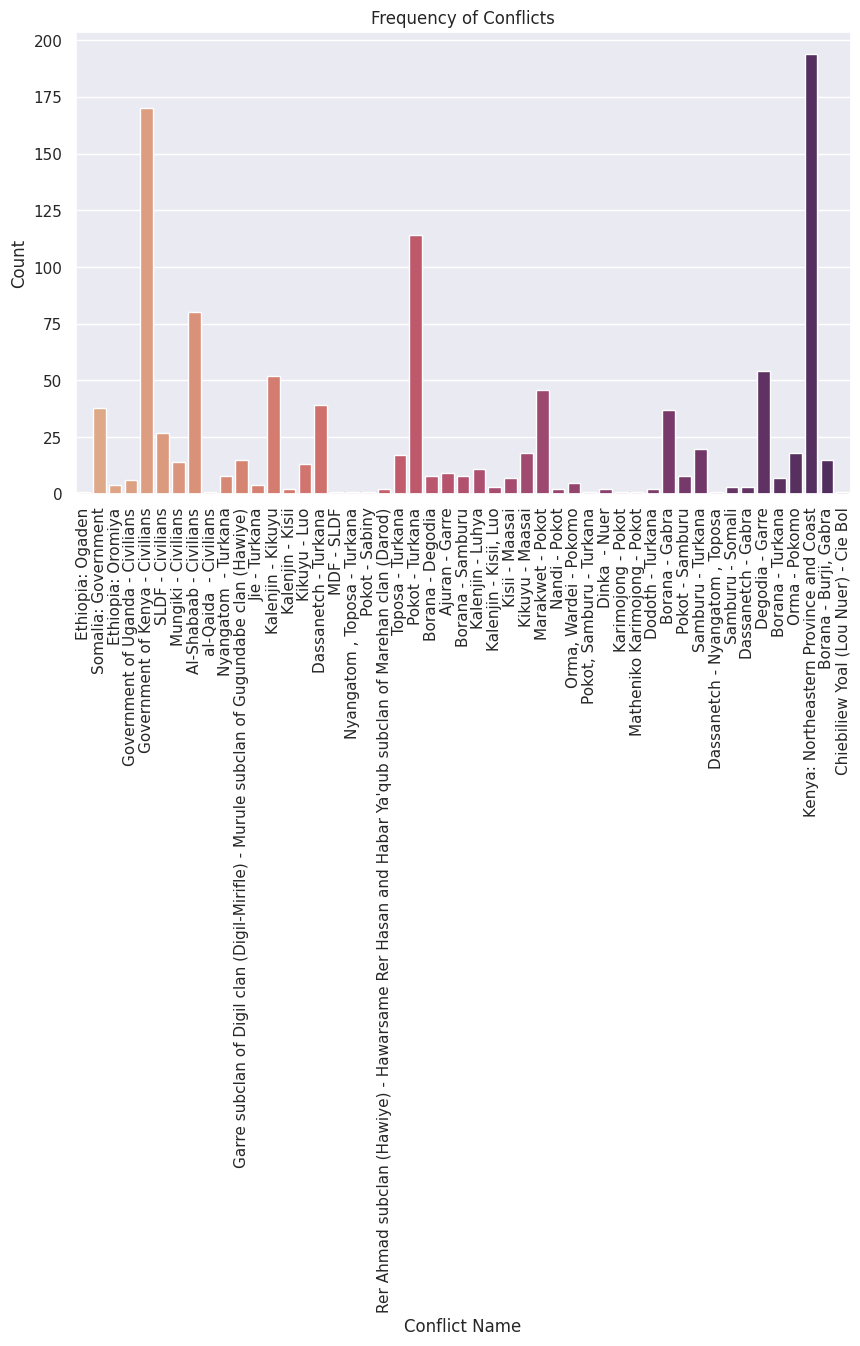

In [ ]:
# "dropna" as False to count NaN (Not-a-Number) values

# Bar Charts Analysis "For conflict feature"
ConflictAnalysis = df.conflict_name.value_counts(dropna=False)
print(ConflictAnalysis)

# Bar Charts Analysis "For conflict feature"
plt.figure(figsize=(10, 6))
sns.countplot(x="conflict_name", data=df, palette="flare")
plt.title("Frequency of Conflicts")
plt.xlabel("Conflict Name")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate the x labels if there are many conflicts
plt.show()

type_of_violence
2.0    560
3.0    298
1.0    237
Name: count, dtype: int64


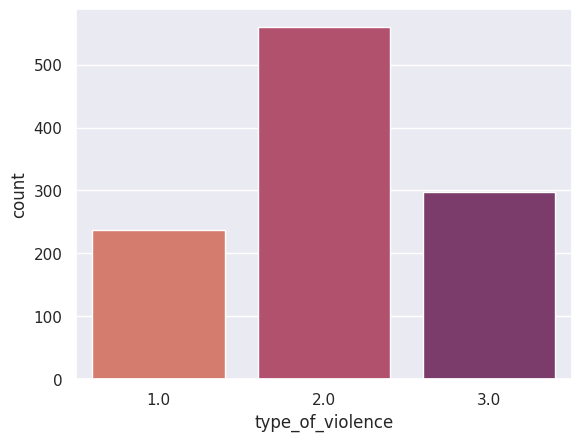

In [ ]:
type_of_violenceAnalysis = df.type_of_violence.value_counts(dropna=False)
print(type_of_violenceAnalysis)

# Bar Charts Analysis "For type_of_violence feature"
sns.countplot(x="type_of_violence", data=df, palette="flare")
plt.show()

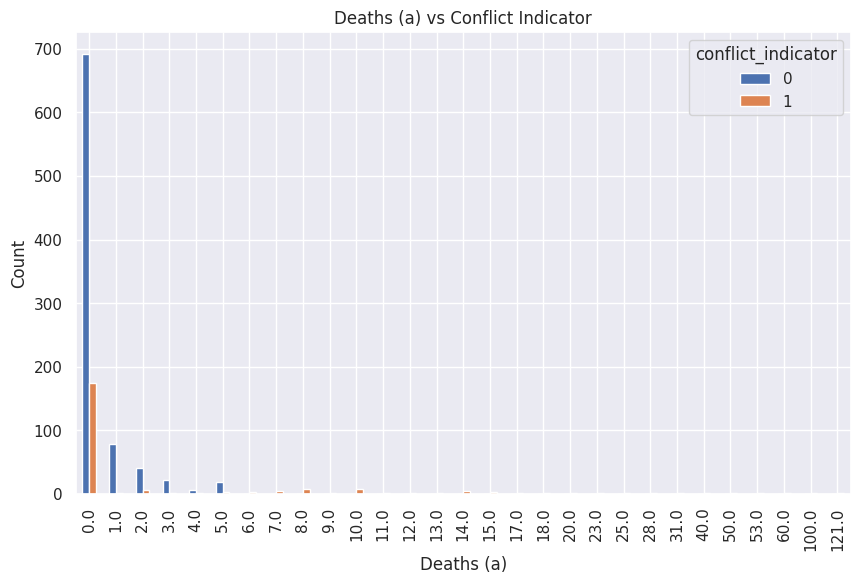

In [ ]:
crosstab = pd.crosstab(df['deaths_a'], df['conflict_indicator'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (a) vs Conflict Indicator')

# Label the x-axis
plt.xlabel('Deaths (a)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()


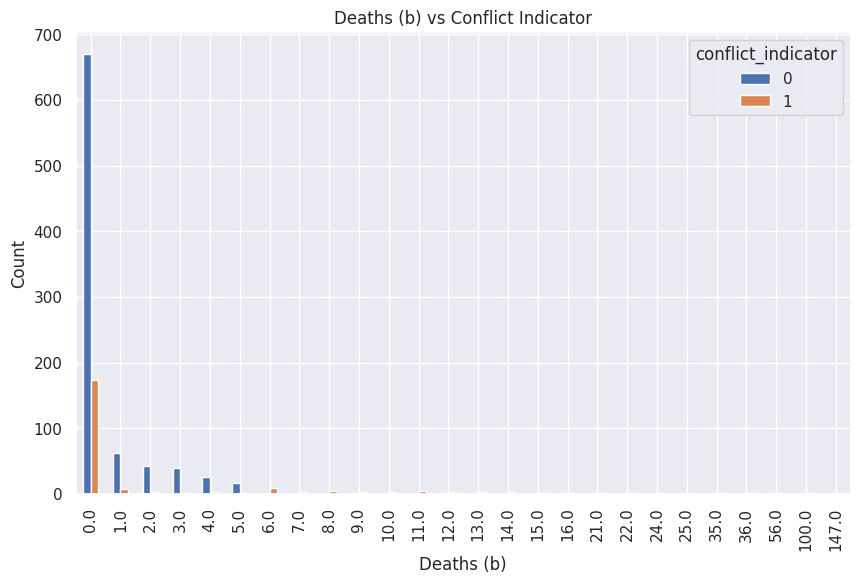

In [ ]:
crosstab = pd.crosstab(df['deaths_b'], df['conflict_indicator'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (b) vs Conflict Indicator')

# Label the x-axis
plt.xlabel('Deaths (b)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

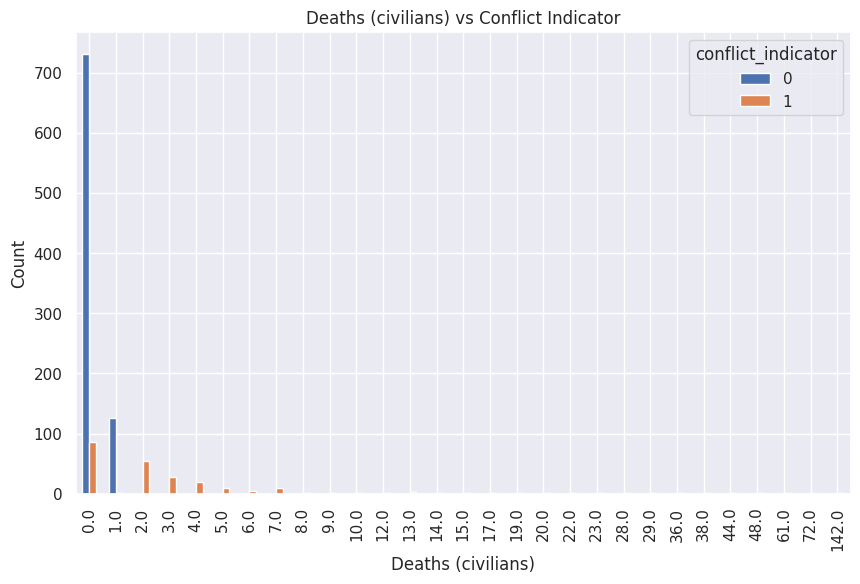

In [ ]:
crosstab = pd.crosstab(df['deaths_civilians'], df['conflict_indicator'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (civilians) vs Conflict Indicator')

# Label the x-axis
plt.xlabel('Deaths (civilians)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

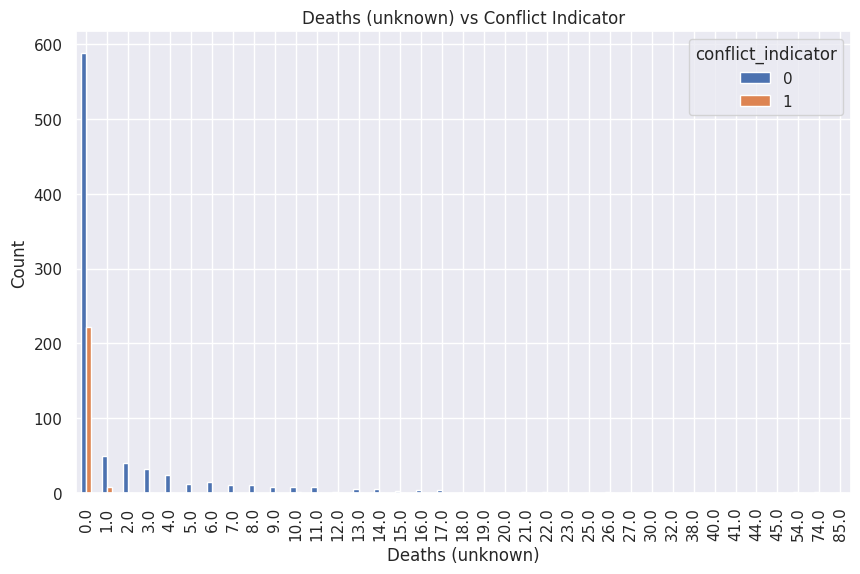

In [ ]:
crosstab = pd.crosstab(df['deaths_unknown'], df['conflict_indicator'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (unknown) vs Conflict Indicator')

# Label the x-axis
plt.xlabel('Deaths (unknown)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

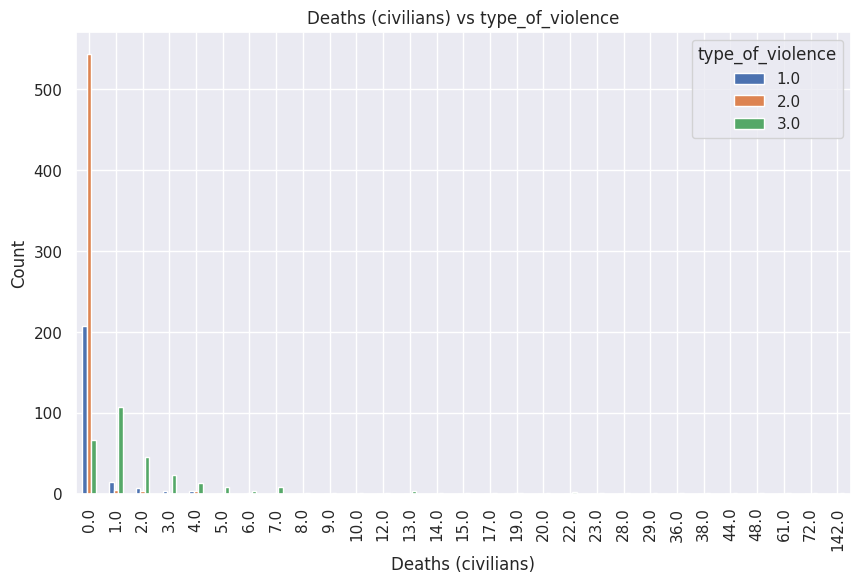

In [ ]:

crosstab = pd.crosstab(df['deaths_civilians'], df['type_of_violence'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (civilians) vs type_of_violence')

# Label the x-axis
plt.xlabel('Deaths (civilians)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

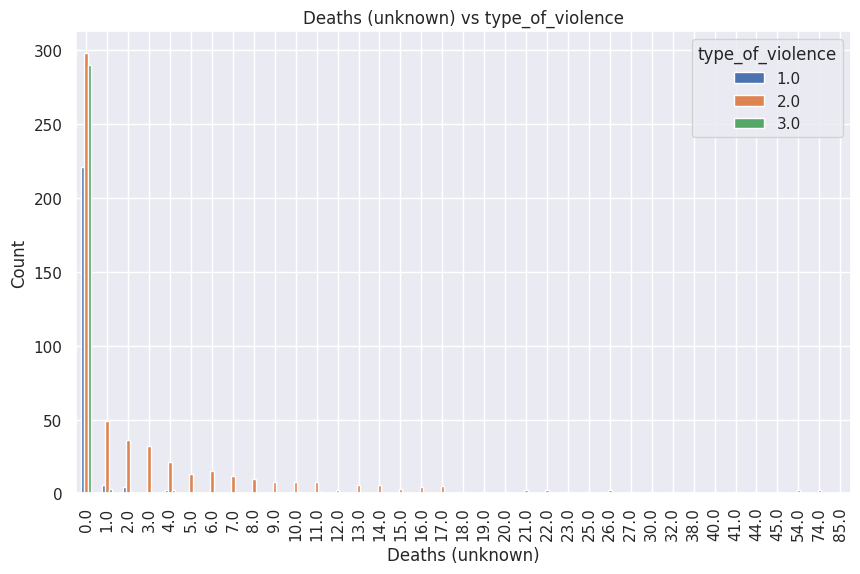

In [ ]:

crosstab = pd.crosstab(df['deaths_unknown'], df['type_of_violence'])

# Plot the crosstab
crosstab.plot(kind="bar", figsize=(10, 6))

# Add a title to the plot
plt.title('Deaths (unknown) vs type_of_violence')

# Label the x-axis
plt.xlabel('Deaths (unknown)')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

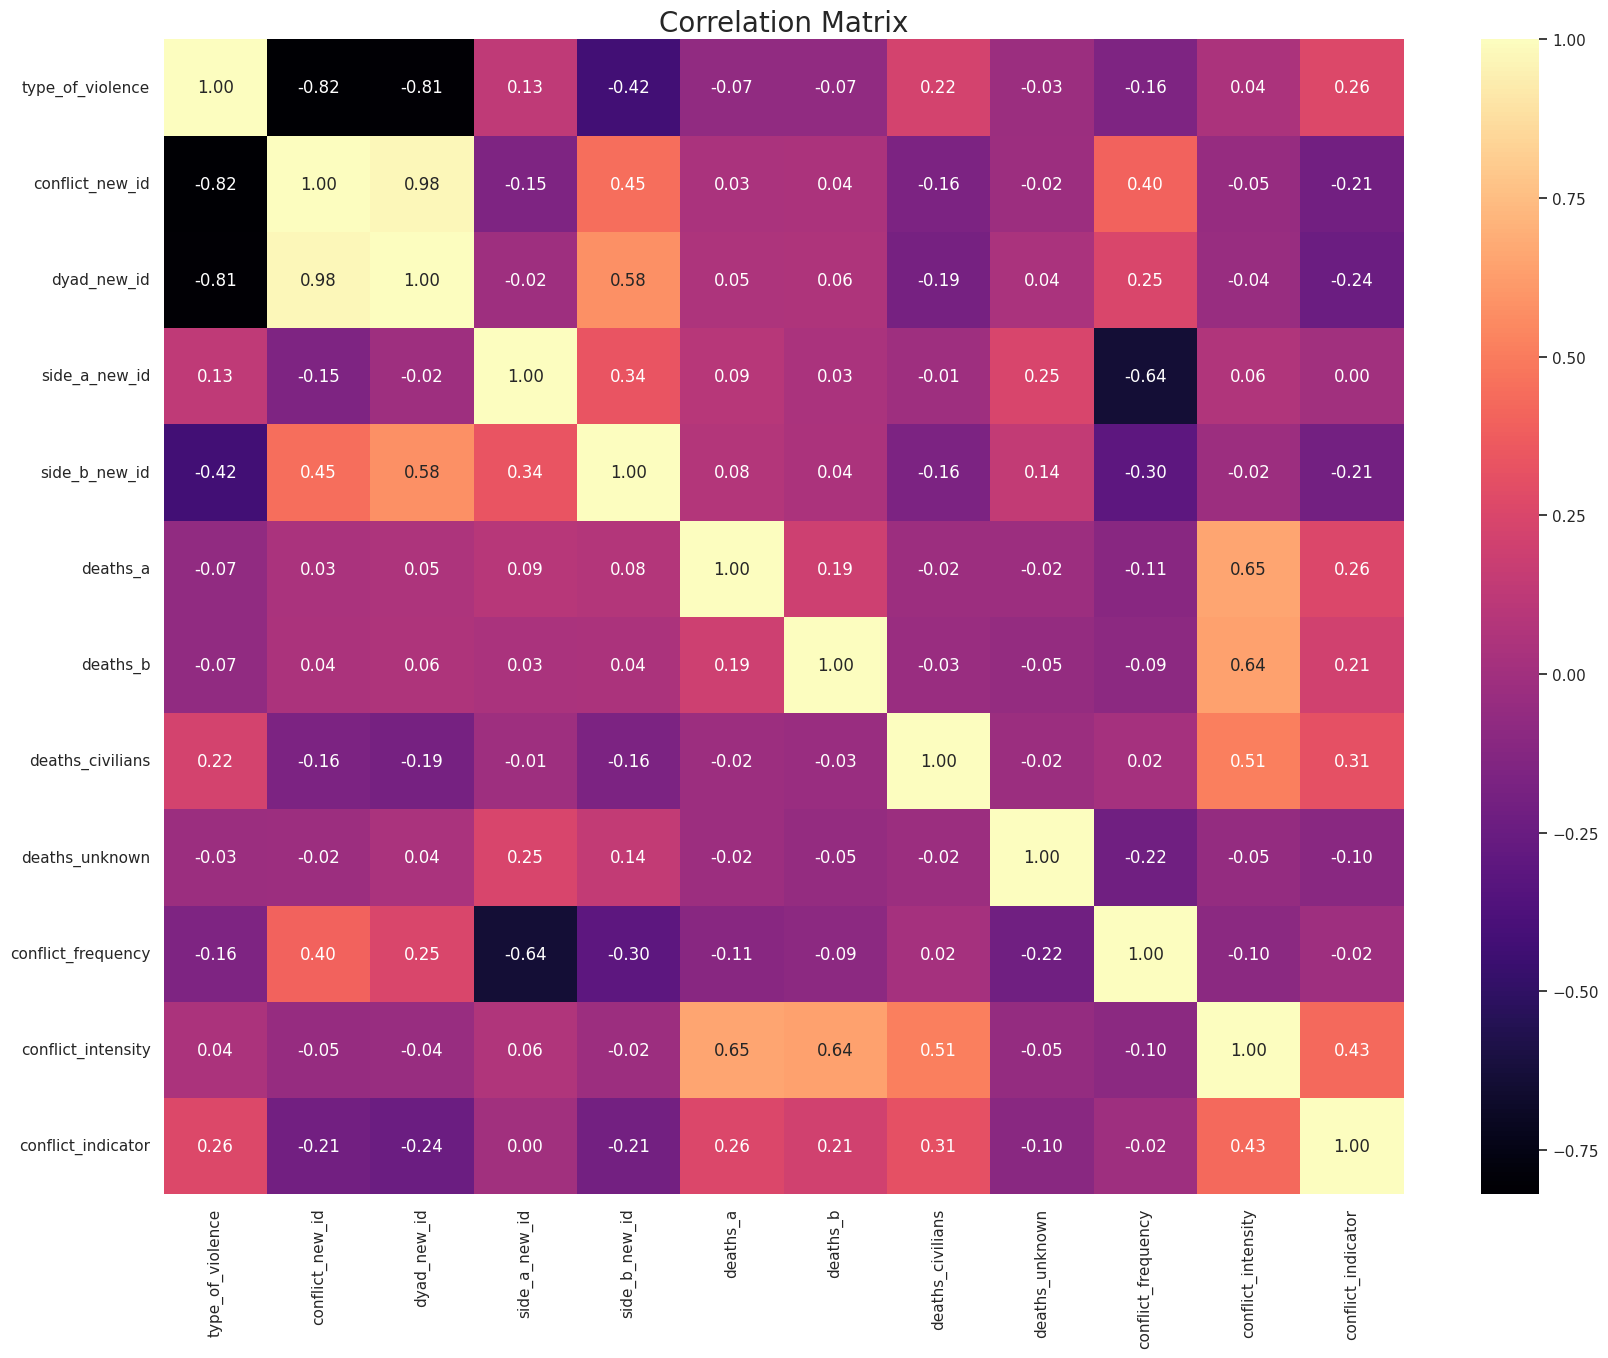

In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# determine if there is any correlation that exist between all the variables plotted against each other
# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=[20, 15])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [ ]:
#columns_to_drop = ['time_since_last']
#df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
#feature and target separation
X=df[['conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'side_b_new_id',
             'deaths_a', 'deaths_b',
            'deaths_civilians', 'deaths_unknown', 'conflict_frequency',
            'conflict_intensity']]
Y=df['conflict_indicator']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Variance of y in the test set: 0.1247680406997352

Variance of features in the test set:
                      Feature      Variance
conflict_new_id     Feature 0  2.184843e+07
dyad_new_id         Feature 1  1.249160e+07
side_a_new_id       Feature 2  4.129197e+05
side_b_new_id       Feature 3  4.606308e+05
deaths_a            Feature 4  1.537299e+01
deaths_b            Feature 5  6.270136e+00
deaths_civilians    Feature 6  2.197164e+01
deaths_unknown      Feature 7  3.641375e+01
conflict_frequency  Feature 8  4.808726e+03
conflict_intensity  Feature 9  4.457538e+01
Accuracy: 0.97
Precision: 0.86
Recall: 0.97
F1-score: 0.91
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       187
           1       0.86      0.97      0.91        32

    accuracy                           0.97       219
   macro avg       0.93      0.97      0.95       219
weighted avg       0.98      0.97      0.97       219



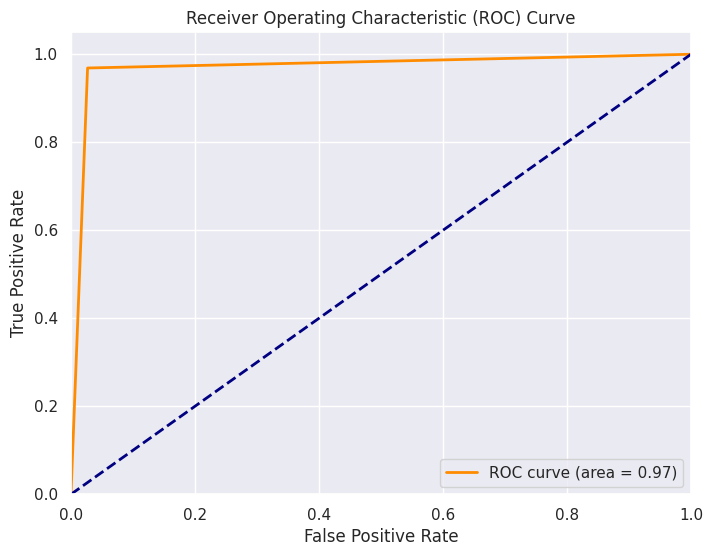

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)
# Print the variance of y in the test set
y_test_variance = np.var(y_test)
print(f"Variance of y in the test set: {y_test_variance}")
feature_variances = np.var(X_test, axis=0)
feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
variance_table = pd.DataFrame({"Feature": feature_names, "Variance": feature_variances})
print("\nVariance of features in the test set:")
print(variance_table)


# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

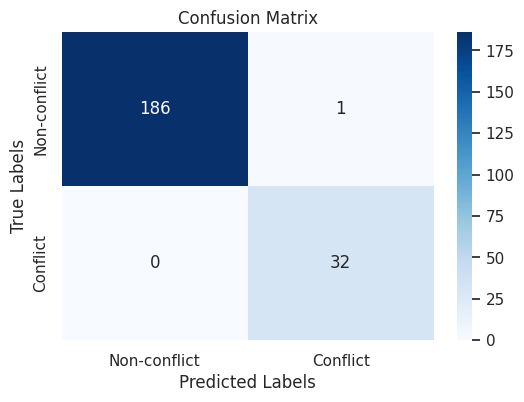

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred > 0.5)

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, index=['Non-conflict', 'Conflict'],
                            columns=['Non-conflict', 'Conflict'])

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#feature and target separation
X=df[['conflict_new_id', 'dyad_new_id', 'side_a_new_id', 'side_b_new_id',
             'deaths_a', 'deaths_b',
            'deaths_civilians', 'deaths_unknown', 'conflict_frequency',
            'conflict_intensity']]
Y=df['conflict_indicator']

In [ ]:
df.head(5)

,year,type_of_violence,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,latitude,longitude,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,conflict_frequency,conflict_intensity,conflict_indicator
1,2011,1.0,329.0,719.0,97.0,497.0,-1.283333,36.816667,2011-06-20 00:00:00.000,2011-06-20 00:00:00.000,0.0,1.0,0.0,0.0,1,1.0,0
2,2007,1.0,337.0,749.0,95.0,505.0,3.936804,41.858383,2007-03-16 00:00:00.000,2007-03-16 00:00:00.000,1.0,0.0,0.0,0.0,1,1.0,0
3,2011,1.0,337.0,750.0,95.0,717.0,3.936804,41.858383,2011-11-24 00:00:00.000,2011-11-24 00:00:00.000,1.0,0.0,0.0,0.0,37,1.0,0
4,2012,1.0,337.0,750.0,95.0,717.0,-1.717327,41.334830,2012-01-01 00:00:00.000,2012-01-01 00:00:00.000,0.0,3.0,0.0,0.0,37,3.0,0
5,2012,1.0,337.0,750.0,95.0,717.0,-1.745460,41.488778,2012-01-02 00:00:00.000,2012-01-04 00:00:00.000,0.0,2.0,0.0,0.0,37,2.0,0


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 1.00
Precision: 0.97
Recall: 1.00
F1-score: 0.98
ROC-AUC: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       187
           1       0.97      1.00      0.98        32

    accuracy                           1.00       219
   macro avg       0.98      1.00      0.99       219
weighted avg       1.00      1.00      1.00       219



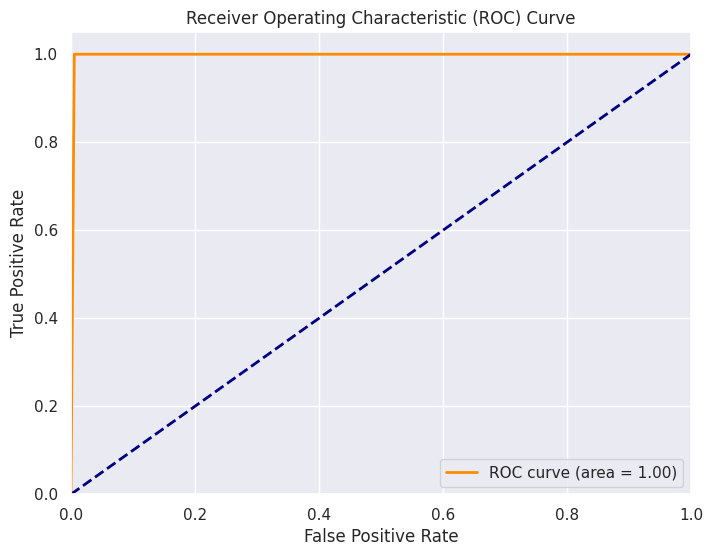

In [ ]:
# Separate features and target
X = df.drop('conflict_indicator', axis=1)
y = df['conflict_indicator']


# train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

In [ ]:
df.head(5)

,year,type_of_violence,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,latitude,longitude,deaths_a,deaths_b,deaths_civilians,deaths_unknown,conflict_frequency,conflict_intensity,conflict_indicator
1,2011,1.0,329.0,719.0,97.0,497.0,-1.283333,36.816667,0.0,1.0,0.0,0.0,1,1.0,0
2,2007,1.0,337.0,749.0,95.0,505.0,3.936804,41.858383,1.0,0.0,0.0,0.0,1,1.0,0
3,2011,1.0,337.0,750.0,95.0,717.0,3.936804,41.858383,1.0,0.0,0.0,0.0,37,1.0,0
4,2012,1.0,337.0,750.0,95.0,717.0,-1.717327,41.334830,0.0,3.0,0.0,0.0,37,3.0,0
5,2012,1.0,337.0,750.0,95.0,717.0,-1.745460,41.488778,0.0,2.0,0.0,0.0,37,2.0,0


LR: 0.925046 (0.069787)
CART: 0.991760 (0.011197)
RF: 0.998173 (0.003653)
SVM: 0.701693 (0.155370)
XGB: 1.000000 (0.000000)


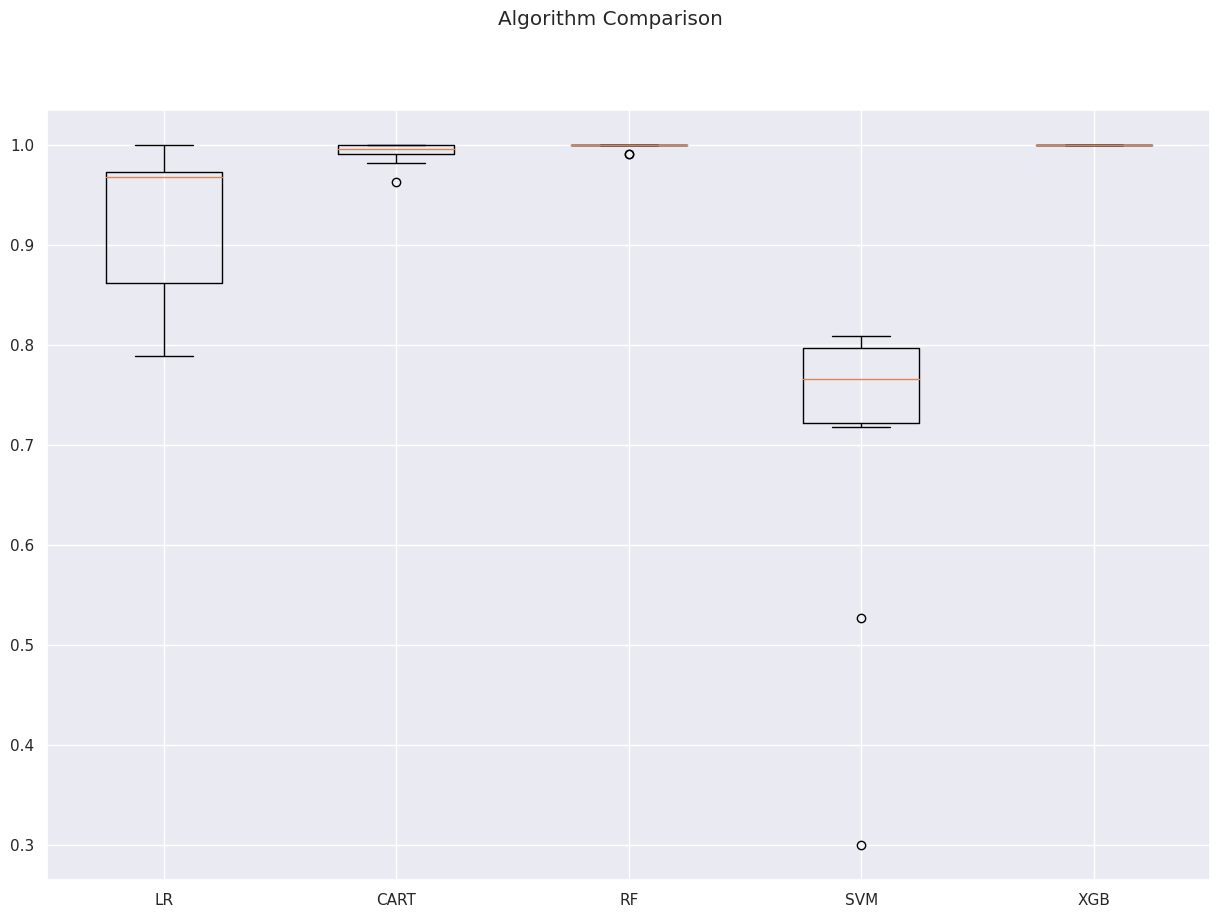

In [ ]:
for name, model in models:

        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print('MODEL TUNING')

MODEL TUNING


In [ ]:
print('1. XGBOOST TUNING')

1. XGBOOST TUNING


In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
#HYPERPARAMETER TUNING
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
#Hyperparameter tuning using grid search then evaluate performance using cross validation
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 0.1,
 'n_estimators': 1000,
 'subsample': 0.9}

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

1.0

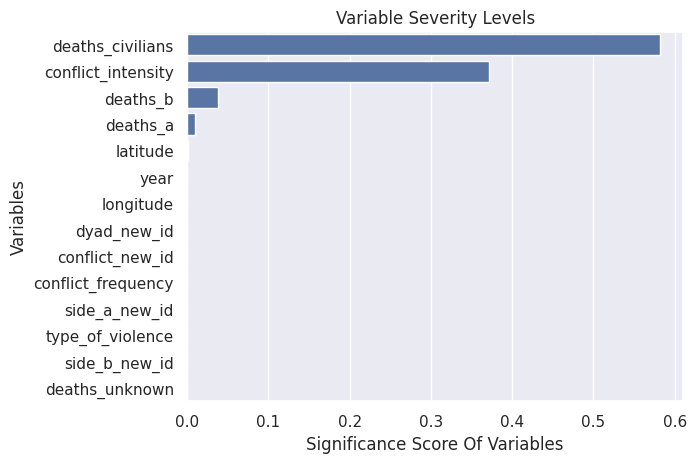

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [ ]:
print('2. RANDOM FOREST TUNING')

2. RANDOM FOREST TUNING


In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000],
             "max_features": [3,5,7],
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [ ]:
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
gs_cv = GridSearchCV(rf_model,
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [ ]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [ ]:
rf_tuned = rf_tuned.fit(X,y)

In [ ]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.9981734778982487

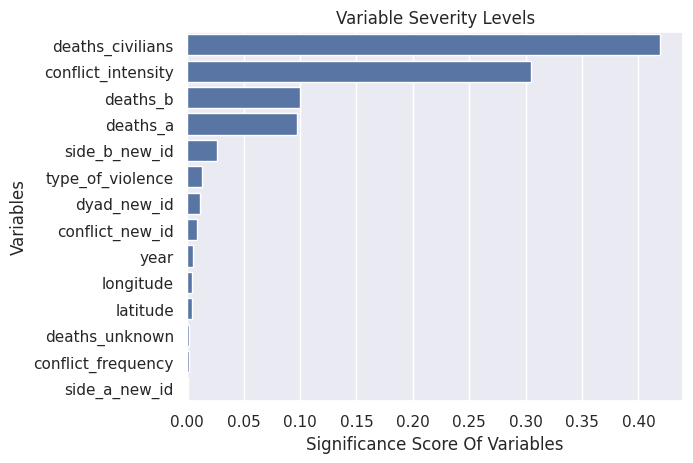

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

# evaluate each model in turn
results = []
names = []

RF: 0.998173 (0.003653)
XGB: 0.998165 (0.005505)


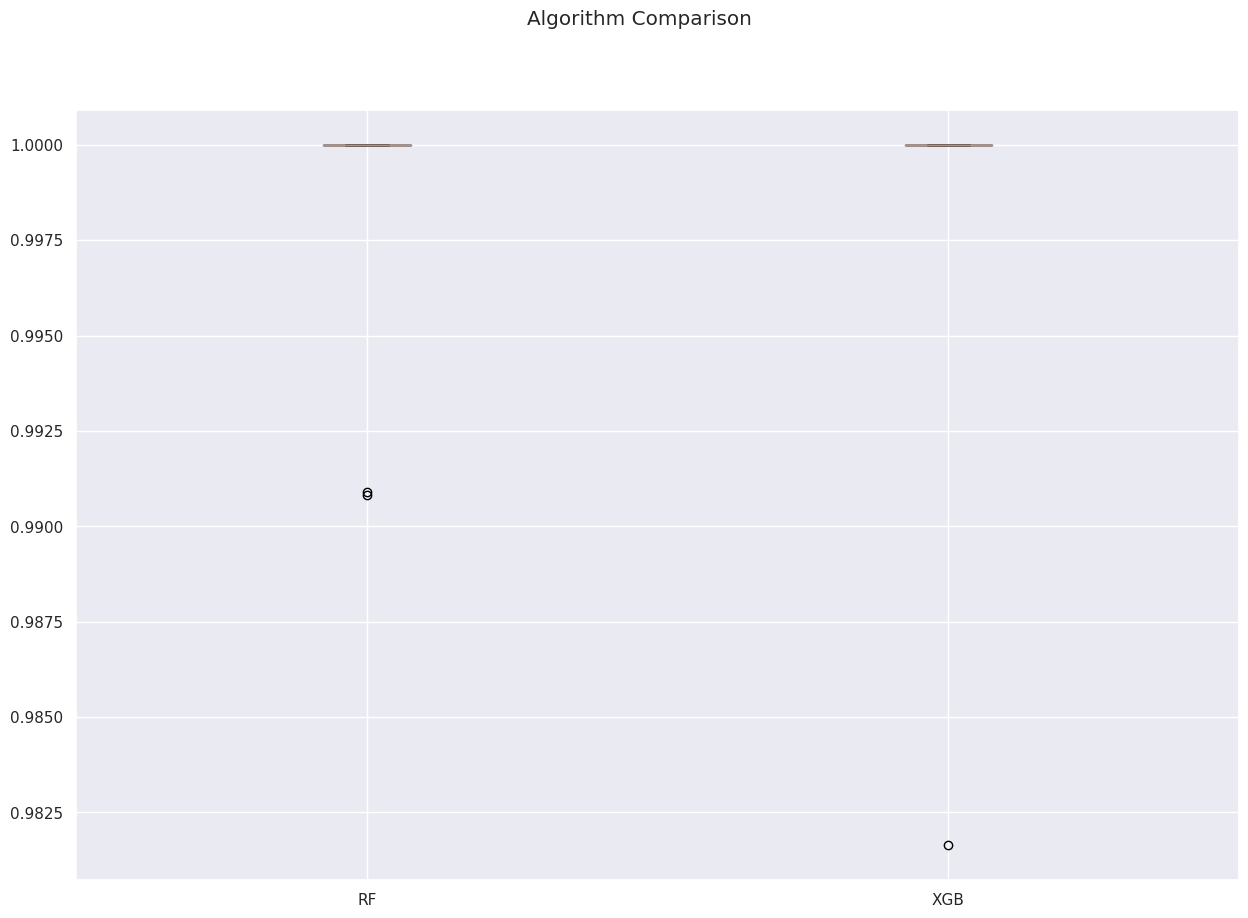

In [ ]:
for name, model in models:

        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

